In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv('x_values.csv').values
dfy=pd.read_csv('y_values.csv').values
x=dfx.reshape((-1,))
y=dfy.reshape((-1,))
print(x)
print(y)

[10 13  9 11 14  6 15 17 12 15  8]
[120 111 140 125 167 112 133 148 122 130 120]


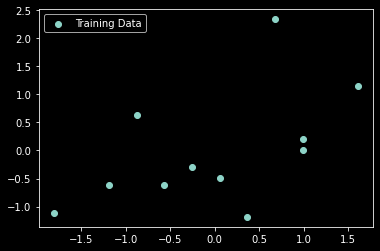

In [3]:
X=(x-x.mean())/x.std()
Y=(y-y.mean())/y.std()
#X=x
#Y=y
plt.style.use('dark_background')
plt.scatter(X,Y,label="Training Data")
plt.legend()
plt.show()

In [4]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [5]:
def error(X,Y,theta):
    err=0
    for i in range(X.shape[0]):
        hx=hypothesis(X[i],theta)
        err+=(hx-Y[i])**2
    return err

In [6]:
def gradient(X,Y,theta):
    grad=np.zeros((2,))
    for i in range(X.shape[0]):
        hx=hypothesis(X[i],theta)
        grad[0]+=hx-Y[i]
        grad[1]+=(hx-Y[i])*X[i]
    return grad

In [7]:
def grad_des(X,Y,l_rate=0.001):
    theta=np.array([-2.0,0.0])
    max_iter=100
    itr=0
    err_list=[]
    theta_list=[]
    while(itr<=max_iter):
        grad=gradient(X,Y,theta)
        err=error(X,Y,theta)
        err_list.append(err)
        theta_list.append(theta)
        theta[0]-=l_rate*grad[0]
        theta[1]-=l_rate*grad[1]
        itr+=1
    return theta,err_list,theta_list

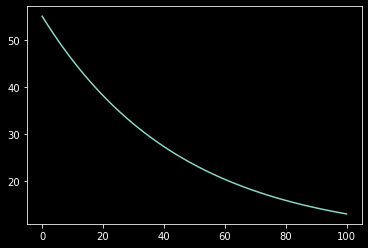

In [8]:
final_theta,err_list,theta_list=grad_des(X,Y)
plt.plot(err_list)
plt.style.use('dark_background')
plt.show()

In [9]:
print(final_theta)

[-0.65441832  0.3553567 ]


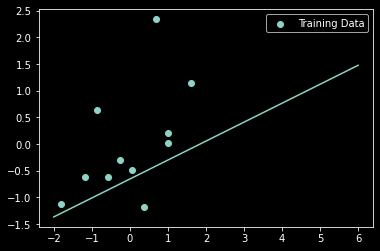

In [10]:
xt=np.linspace(-2,6,10)
plt.scatter(X,Y,label="Training Data")
plt.plot(xt,hypothesis(xt,final_theta))
plt.style.use('dark_background')
plt.legend()
plt.show()